# Prosper Loan Data Exploration
## by Dimitrios Karslidis

## Preliminary Wrangling

> This documant explores a dataset of approximately 114000 loans lent to borrowers from investors  via Propser services.
This dataset include investors' and borrowers' history (approximately 80 features) and borrowers' prosper score based on which the investors make their decisions.

>The description of the features of the data can be found [here](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0)

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb


%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe, print  the first 5 rows
pd.set_option("display.max_rows", None, "display.max_columns", None)
df=pd.read_csv("prosperLoanData.csv")
print("The first 5 rows of the dataframe are ")
df.head()


The first 5 rows of the dataframe are 


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN

In [3]:
#high level overview of the data shape and composition
print("The number of rows are ",df.shape[0])
print("The number of columns are ",df.shape[1])
print("\n")
print(df.dtypes)

The number of rows are  113937
The number of columns are  81


ListingKey                              object
ListingNumber                            int64
ListingCreationDate                     object
CreditGrade                             object
Term                                     int64
LoanStatus                              object
ClosedDate                              object
BorrowerAPR                            float64
BorrowerRate                           float64
LenderYield                            float64
EstimatedEffectiveYield                float64
EstimatedLoss                          float64
EstimatedReturn                        float64
ProsperRating (numeric)                float64
ProsperRating (Alpha)                   object
ProsperScore                           float64
ListingCategory (numeric)                int64
BorrowerState                           object
Occupation                              object
EmploymentStatus                        obje

In [4]:
#descriptive statistics for numerical variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ListingNumber,113937.0,627885.692506,328076.236386,4.00000,400919.000000,600554.000000,892634.00000,1.255725e+06
Term,113937.0,40.830248,10.436212,12.00000,36.000000,36.000000,36.00000,6.000000e+01
BorrowerAPR,113912.0,0.218828,0.080364,0.00653,0.156290,0.209760,0.28381,5.122900e-01
BorrowerRate,113937.0,0.192764,0.074818,0.00000,0.134000,0.184000,0.25000,4.975000e-01
LenderYield,113937.0,0.182701,0.074516,-0.01000,0.124200,0.173000,0.24000,4.925000e-01
EstimatedEffectiveYield,84853.0,0.168661,0.068467,-0.18270,0.115670,0.161500,0.22430,3.199000e-01
EstimatedLoss,84853.0,0.080306,0.046764,0.00490,0.042400,0.072400,0.11200,3.660000e-01
EstimatedReturn,84853.0,0.096068,0.030403,-0.18270,0.074080,0.091700,0.11660,2.837000e-01
ProsperRating (numeric),84853.0,4.072243,1.673227,1.00000,3.000000,4.000000,5.00000,7.000000e+00
ProsperScore,84853.0,5.950067,2.376501,1.00000,4.000000,6.000000,8.00000,1.100000e+01


In [5]:
#print the general information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [6]:
#print the number of missing values in each columns
df.isna().sum()

ListingKey                                  0
ListingNumber                               0
ListingCreationDate                         0
CreditGrade                             84984
Term                                        0
LoanStatus                                  0
ClosedDate                              58848
BorrowerAPR                                25
BorrowerRate                                0
LenderYield                                 0
EstimatedEffectiveYield                 29084
EstimatedLoss                           29084
EstimatedReturn                         29084
ProsperRating (numeric)                 29084
ProsperRating (Alpha)                   29084
ProsperScore                            29084
ListingCategory (numeric)                   0
BorrowerState                            5515
Occupation                               3588
EmploymentStatus                         2255
EmploymentStatusDuration                 7625
IsBorrowerHomeowner               

>__For our analysis we are going to keep the following features `ProsperScore`, `Occupation`,`IsBorrowerHomeowner`,`ListingCategory`,`RevolvingCreditBalance`,
`DebtToIncomeRatio`,`BorrowerRate`,`StatedMonthlyIncome`,`IncomeVerifiable`,`CurrentDelinquencies`,`TotalInquires` and `AvailableBankcardCredit`__

In [7]:
#Let's check the types of the aforementioned column names and how many ,missing values these columns have
#First rename some columns such as 'ProsperRating (numeric)' and 'ListingCategory (numeric)'
df.rename(columns={'ProsperRating (numeric)':'ProsperRating','ListingCategory (numeric)':'ListingCategory'},
          inplace=True)
col_names=['ProsperScore','Occupation','IsBorrowerHomeowner','ListingCategory',
           'DebtToIncomeRatio','BorrowerRate',
           "StatedMonthlyIncome",'IncomeVerifiable',"RevolvingCreditBalance",'CurrentDelinquencies',
          'TotalInquiries','AvailableBankcardCredit']
print("The types of the column names for our analysis:")
print("\n")
df[col_names].info() #most of them are numeric. Although some features are presented as numeric, in fact
#they are quantitative such as ListingCategory or ProsperScore


The types of the column names for our analysis:


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   ProsperScore             84853 non-null   float64
 1   Occupation               110349 non-null  object 
 2   IsBorrowerHomeowner      113937 non-null  bool   
 3   ListingCategory          113937 non-null  int64  
 4   DebtToIncomeRatio        105383 non-null  float64
 5   BorrowerRate             113937 non-null  float64
 6   StatedMonthlyIncome      113937 non-null  float64
 7   IncomeVerifiable         113937 non-null  bool   
 8   RevolvingCreditBalance   106333 non-null  float64
 9   CurrentDelinquencies     113240 non-null  float64
 10  TotalInquiries           112778 non-null  float64
 11  AvailableBankcardCredit  106393 non-null  float64
dtypes: bool(2), float64(8), int64(1), object(1)
memory usage: 8.9+ M

In [8]:
#The numebr of mising values in each of col_names
df.isna().sum()[col_names]

ProsperScore               29084
Occupation                  3588
IsBorrowerHomeowner            0
ListingCategory                0
DebtToIncomeRatio           8554
BorrowerRate                   0
StatedMonthlyIncome            0
IncomeVerifiable               0
RevolvingCreditBalance      7604
CurrentDelinquencies         697
TotalInquiries              1159
AvailableBankcardCredit     7544
dtype: int64

Let'remove the missing values from the above columns. Note that, zero in `ListingCategory` corresponds to the null values.

In [9]:
#let's drop the missing values
df.dropna(subset=["ProsperScore","Occupation","DebtToIncomeRatio","RevolvingCreditBalance",
                  "CurrentDelinquencies","TotalInquiries","AvailableBankcardCredit"],
         how="any",axis=0,inplace=True)

In [10]:
#Remove the rows from the column ListingCategory having value zero
df["ListingCategory"]=df["ListingCategory"].apply(lambda x:np.nan if x==0 else x ).dropna(how="any",axis=0)

In [11]:
#Let's convert the boolean values True and False to 1 and 0 repsectively in the columns IsBorrowerHomeowner 
#and Incomeverifiable
df["IsBorrowerHomeowner"]=df["IsBorrowerHomeowner"].apply(lambda x: 1 if x==True else 0)
df["IncomeVerifiable"]=df["IncomeVerifiable"].apply(lambda x: 1 if x==True else 0)

In [12]:
#Let's convert ProsperScore into an ordered categorical variable
df["ProsperScore"]=df["ProsperScore"].astype(int)
ordinal_var_dict = {'ProsperScore': [k for k in range(1,12)]}
for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    df[var] = df[var].astype(ordered_var)

In [13]:
#Print the dimensions of the cleaned data and call the cleaned df by data having the features for the analysis
data=df[col_names]
print(data.shape)

(76224, 12)


In [14]:
#Let's save the clean data in the file cleanprosperloandata.csv
target_var="ProsperScore"
data["ProsperScore_int"]=data[target_var].astype(int)#having Prosper Score as int
data.to_csv("cleanprosperloandata.csv",index=False)

<ipython-input-14-aaba46d94d90>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["ProsperScore_int"]=data[target_var].astype(int)#having Prosper Score as int


### What is the structure of your dataset?
After we cleaned the data, the dataframe `data` has approximately 76000 records and 12 features that we are interested in. Most of the features are numeric in nature. However, there are some qualitiative features as well.
Qualitative variables are `ProsperScore`,`Occupation`,`IsBorrowerHomeOwner`,`ListingCategory` and `IncomeVerifiable`. 

Furthermore, the feature `ProsperScore` is ordinal with the following levels:
1(worst)-11(best)

Moreover, the levels of the column `ListingCategory` (it is a nominal variable) are  1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans.


### What is/are the main feature(s) of interest in your dataset?

> I am interested in discovering what features from the data correlated to the variable ProsperScore.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I suspect that features such as `DebtToIncomeRatio`, `StatedMonthlyIncome`, `Occupation`, `RevolvingCreditBalance`, `TotalInquiries` and `CurrentDelinquencies`   might have effect on the feature `ProsperScore`.

## Univariate Exploration


First, we woud like to visualize the distribution of `ProsperScore` by finding first the relative frequency for each discrete value of  `ProsperScore`.

In [15]:
count=data["ProsperScore"].value_counts().sort_index()
rel_freq=count/count.sum()
rel_freq#compute the relative frequency for each level of the feature PropserScore


1     0.009380
2     0.061332
3     0.083622
4     0.142029
5     0.113429
6     0.146371
7     0.128791
8     0.149979
9     0.086443
10    0.060362
11    0.018262
Name: ProsperScore, dtype: float64

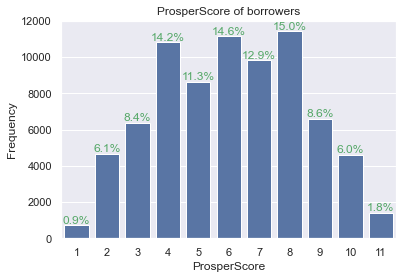

In [16]:
#create a barplot for ProsperScore
sb.set()
sb.countplot(data=data,x="ProsperScore",color=sb.color_palette()[0])
plt.title("ProsperScore of borrowers",fontsize=12)
plt.ylabel("Frequency",fontsize=12)
for i in range(count.shape[0]):
    plt.text(i,count.iloc[i]+1,str(round(rel_freq.iloc[i]*100,1))+"%",ha="center",va="bottom",color="g")

We can see that most of the borrowers have been assigned scores between 3 and 9 (over than 86 %). However, the scores 4,6 and 8 are ones of the most frequent ones. Only 1.6% of borrowers have been assigned the best score (11)and 0.9% the worst score (1).

Next, it would be interesting to see the reasons people borrow money. This can be achived by visualizing the distribution of `ListingCategory`.

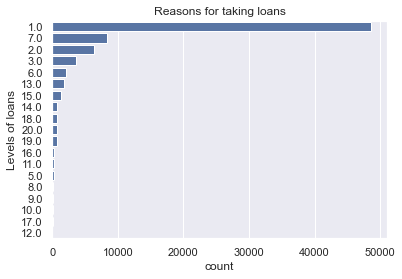

In [17]:
#Let's check for what purposes people get loans
count=data["ListingCategory"].value_counts()
idx=count.index
sb.countplot(data=data,y="ListingCategory",color=sb.color_palette()[0],order=idx)
plt.ylabel("Levels of loans",fontsize=12)
plt.title("Reasons for taking loans",fontsize=12);


Recall the correspondence between the levels of loans (numbers on the y-axis) and their descriptions:

0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans

As we can see the majority of borrowers borrow money for Debt Cosolidation (which corresponds to the rank 1.0)

Another interesting point to research is to see the distribution of `Occupation` which corresponds to the top 20 monthly salaries and that's what we are going to do next.

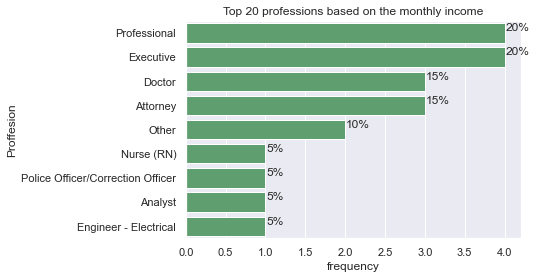

In [18]:
top_occupation=data[["Occupation","StatedMonthlyIncome"]].sort_values(by="StatedMonthlyIncome",
                                                                       ascending=False).head(20)#the top 20 occupations
idx=top_occupation["Occupation"].value_counts().index
sb.countplot(data=top_occupation,y="Occupation",color=sb.color_palette()[2],order=idx)
plt.ylabel("Proffesion",fontsize=12)
plt.xlabel("frequency",fontsize=12)
plt.title("Top 20 professions based on the monthly income",fontsize=12);
for k in range(len(idx)):
    x_cor=top_occupation["Occupation"].value_counts().iloc[k]+0.01
    y_cor=k
    text=str(int(((x_cor-0.01)/top_occupation.shape[0])*100))+"%"
    plt.text(x_cor,y_cor,text,va="bottom")


As we can see that in top 20 professions we find the professions that we'd expect to see. It is interesting to observe that 10% of these professions are declared as 'Other'. Also, in top 20 we can observe professions
such as Nurse or Police officer. Although their salaries are not one of the highest ones, but their monthly income 
must be high. The cell below show the income of top 20 professions.

In [19]:
top_occupation.head(20)#The income of thetop 20 professions


,Occupation,StatedMonthlyIncome
17411,Professional,483333.333333
57133,Other,466666.666667
8066,Police Officer/Correction Officer,416666.666667
113270,Other,394400.000000
80075,Attorney,158333.333333
111265,Executive,108750.000000
59928,Nurse (RN),96266.500000
63149,Doctor,91666.666667
52293,Professional,83333.333333
60563,Engineer - Electrical,79166.666667


Next, we investigate the barplots of `IincomeVerifiable` and `IsBorrowerHomeowner`

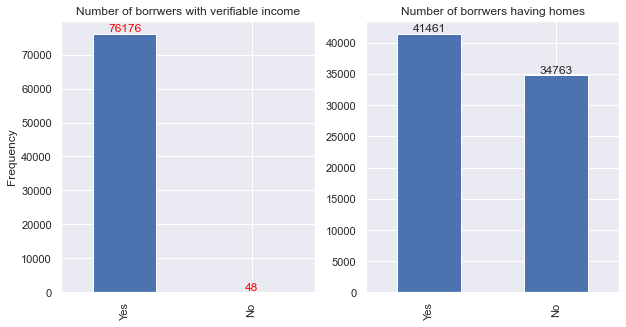

In [20]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
count_1=data.IncomeVerifiable.value_counts()#number of borrowers with verifiable income
count_1.plot(kind="bar",ax=ax[0])
ax[0].set(ylabel="Frequency",title="Number of borrwers with verifiable income")
for i in range(count_1.shape[0]):
    ax[0].text(i,count_1.iloc[i]+0.2,str(count_1.iloc[i]),ha="center",va="bottom",color="red")
ax[0].set_xticks([0,1])
ax[0].set(xticklabels=["Yes","No"])
count_2=data.IsBorrowerHomeowner.value_counts()#number of borrowers who have a home
count_2.plot(kind="bar",ax=ax[1])
ax[1].set(ylabel="",title="Number of borrwers having homes")
for i in range(count_2.shape[0]):
    ax[1].text(i,count_2.iloc[i]+0.2,str(count_2.iloc[i]),ha="center",va="bottom")
ax[1].set_xticks([0,1])
ax[1].set(xticklabels=["Yes","No"]);



According to the above bar charts the income can be verified for the majority of the borrowers and there are almost two equal groups of borrowers who have a home and who don't.

Now we are going to invistigate the histograms for features such as `DebtToIncomeRatio`,`RevolvingCreditBalance`,`CurrentDelinquencies`,`TotalInquiries`,`AvailableBankcardCredit`

In [21]:
data["DebtToIncomeRatio"].describe([0.01,0.25,0.5,0.75,0.90,0.95,0.99])

count    76224.000000
mean         0.258041
std          0.320577
min          0.000000
1%           0.040000
25%          0.150000
50%          0.220000
75%          0.320000
90%          0.420000
95%          0.490000
99%          0.720000
max         10.010000
Name: DebtToIncomeRatio, dtype: float64

The 99th percentile is  0.72
Only 322 borrowers owe more money than they make


(0.0, 0.72)

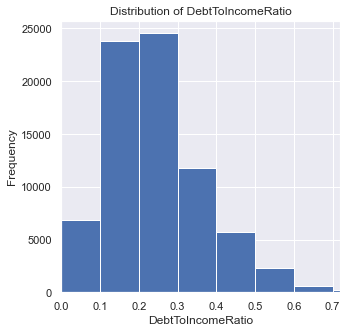

In [22]:
#Create the histogram for DebtToIncomeRatio
plt.figure(figsize=(5,5))
step=0.1
bins=np.arange(0,data["DebtToIncomeRatio"].max()+step,step)
plt.hist(data=data,x="DebtToIncomeRatio",bins=bins)
plt.xlabel("DebtToIncomeRatio")
plt.ylabel("Frequency")
plt.title("Distribution of DebtToIncomeRatio")#as you can see most of the values lie in the range [0,1]
num=(data["DebtToIncomeRatio"]>1).sum()
print("The 99th percentile is ",np.percentile(data["DebtToIncomeRatio"],q=99))
print(f"Only {num} borrowers owe more money than they make")
plt.xlim([0,0.72])#removes the outliers

99% of the borrwers owe less maney than they make. As a result, 99% of the values lie in the interval [0,0.72].
Most of the borrowers owe between 0.1 and 0.3 of their income.

Next, apply a log transformation to `DebtToIncomeRario`

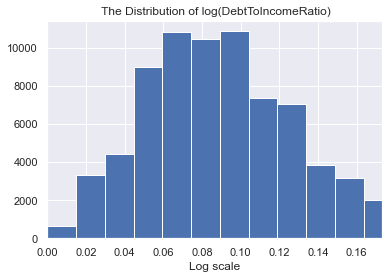

In [23]:
plt.hist(np.log10(data["DebtToIncomeRatio"]+1),bins=70)
plt.xlim([0,np.log10(0.49+1)])
plt.xlabel("Log scale")
plt.title(" The Distribution of log(DebtToIncomeRatio)");

The distribution of `DebtToIncomeRatio` has become more symmetrical.

In [24]:
def make_hist(col_name,step,ax=None,kde=True):
    """This function creates a histogram of a given feature"""
    bins=np.arange(data[col_name].min(),data[col_name].max()+step,step)
    sb.histplot(data=data,x=col_name,bins=bins,kde=kde,ax=ax)
    plt.xlabel(f"{col_name}",fontsize=12)
    plt.ylabel("Frequency",fontsize=12)
    plt.title(f"Distribution of {col_name}",fontsize=12)


Descriptive Statistics and Distribution of `RevolvingCreditBalance`

In [25]:
#descriptive Statistics for Revolving CreditBalance
data["RevolvingCreditBalance"].describe([0.01,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count     76224.000000
mean      17750.895099
std       30537.794341
min           0.000000
1%            0.000000
10%        1002.000000
25%        3877.000000
50%        9397.000000
75%       20265.000000
90%       39649.500000
95%       59053.750000
99%      141487.720000
max      999165.000000
Name: RevolvingCreditBalance, dtype: float64

(0.0, 142000.0)

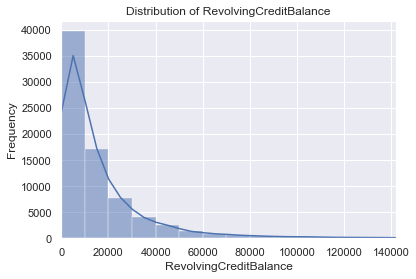

In [26]:
make_hist("RevolvingCreditBalance",step=10000)
plt.xlim([0,142000])

The number of values less than 1 or lager than 142000 is 2629 i.e. only 3.45 % of the values lie outside of 1 and 142000


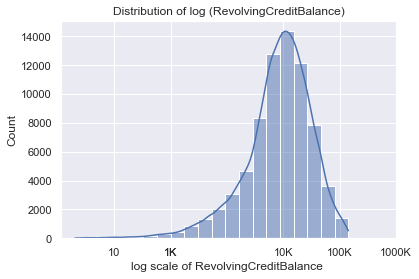

In [27]:
#Apply the log transformation now after the lower values have been removed
mask=(data["RevolvingCreditBalance"]>1)&(data["RevolvingCreditBalance"]<142000)
print(f"The number of values less than 1 or lager than 142000 is {(~mask).sum()} i.e. only {round(((~mask).sum()/data.shape[0])*100,2)} % of the values lie outside of 1 and 142000")
sb.histplot(data=data[mask],x="RevolvingCreditBalance",bins=20,kde=True,log_scale=True)
plt.xlabel("log scale of RevolvingCreditBalance ",fontsize=12)
plt.title("Distribution of log (RevolvingCreditBalance)",fontsize=12)
plt.xticks([10,100,100,10000,100000,1000000],[10,100,"1K","10K","100K","1000K"]);

According to the first plot the major bulk of the data is accumulated on the left side of the  x-axis. As a result, the data is skewed to the right. It seems the distributaion of this data could have possible come from a Gamma distribution. However, applying a log transform to `RevolvingCreditBalance` after removing very small values or big values,we can see that the distribution of log `RevolvingCreditBalance` could have almost come from a Normal distribution except for that left tail.

In [28]:
#descriptive statistics for TotalInquiries
data["TotalInquiries"].describe([0.01,0.25,0.5,0.75,0.9,0.95,0.99])

count    76224.000000
mean         4.344367
std          3.851159
min          0.000000
1%           0.000000
25%          2.000000
50%          3.000000
75%          6.000000
90%          9.000000
95%         11.000000
99%         18.000000
max         78.000000
Name: TotalInquiries, dtype: float64

(0.0, 18.0)

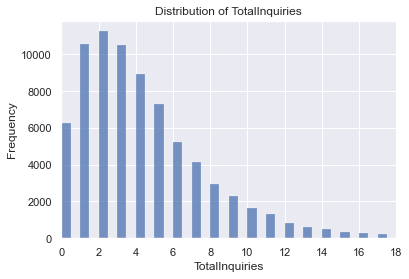

In [29]:
make_hist("TotalInquiries",step=0.5,kde=False)#histogram for TotalInquiries
plt.xlim([0,18])

In [30]:
data["TotalInquiries"].unique() #the unique values of TotalInquiries

array([ 5.,  1.,  9.,  2.,  0., 16.,  6.,  4.,  3., 10.,  8., 12., 11.,
       17.,  7., 13., 34., 19., 14., 18., 25., 21., 15., 20., 22., 27.,
       24., 23., 26., 29., 28., 35., 32., 41., 74., 31., 42., 30., 40.,
       36., 78., 51., 46., 33., 38., 45., 44., 43., 50., 37., 63., 71.])

The frequency of total inquiries decreasing gradually and the distribution of `TotalInquiries` seems to be skewed to the right. Only 1% of the values are larger than 18 so these values can be considered unusual.

In [31]:
data["AvailableBankcardCredit"].describe([0.01,0.25,0.5,0.75,0.9,0.95,0.99])#descriptivestatistics for 
#AvailableBankcardCredit

count     76224.000000
mean      11168.459107
std       18223.467198
min           0.000000
1%            0.000000
25%        1115.000000
50%        4496.500000
75%       13585.250000
90%       29826.500000
95%       44501.850000
99%       83638.130000
max      498374.000000
Name: AvailableBankcardCredit, dtype: float64

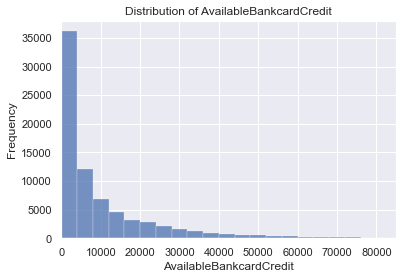

In [32]:
make_hist("AvailableBankcardCredit",step=4000,kde=False) #histogram of AvailableBankcardCredit before applying
# log transformation to the feature
plt.xlim([0,85000]);

Only 2.92 % of the values are less than 1


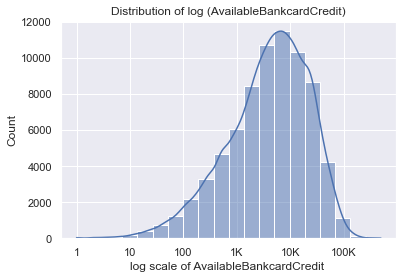

In [33]:
#Apply the log transformation
mask=data["AvailableBankcardCredit"]<1
print(f"Only {round((mask.sum()/data.shape[0])*100,2)} % of the values are less than 1")
sb.histplot(data=data[~mask],x="AvailableBankcardCredit",bins=20,kde=True,log_scale=True)
plt.xlabel("log scale of AvailableBankcardCredit ",fontsize=12)
plt.title("Distribution of log (AvailableBankcardCredit)",fontsize=12)
plt.xticks([1,10,100,1000,10000,100000],[1,10,100,"1K","10K","100K"]);

The distribution of `AvailableBankcardCredit` is skewed to the right as well. However, applying a log transformation after we have removed the small values, we can see the distribution of log(`AvailableBankcardCredit`) becomes more symmetric with some extended left tail.Also only 2.92% of the vlues are less than 1 and 1% values are more than 84000. All these values lying in that range could be considered unusual.

In [34]:
data["CurrentDelinquencies"]=data["CurrentDelinquencies"].astype(int)
data["CurrentDelinquencies"].describe([0.25,0.5,0.75,0.9,0.95,0.99])

<ipython-input-34-c1af2fe64c55>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["CurrentDelinquencies"]=data["CurrentDelinquencies"].astype(int)


count    76224.000000
mean         0.330316
std          1.120827
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
90%          1.000000
95%          2.000000
99%          5.000000
max         32.000000
Name: CurrentDelinquencies, dtype: float64

In [35]:
df["CurrentDelinquencies"].unique() #the unique values of CurrentDelinquencies

array([ 0.,  4.,  1.,  2., 20.,  3.,  6., 11.,  5., 13.,  9., 17.,  7.,
        8., 10., 14., 12., 15., 16., 21., 32., 27., 24., 18., 22.])

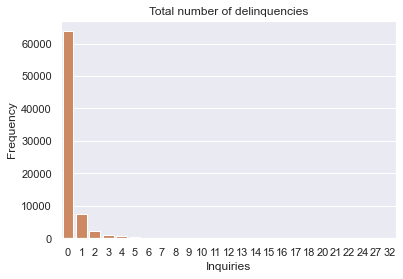

In [36]:
#Barplot for CurrentDelinquencies
sb.countplot(data=data,x="CurrentDelinquencies",color=sb.color_palette()[1])
plt.title("Total number of delinquencies")
plt.xlabel("Inquiries")
plt.ylabel("Frequency");

According to the above barchart most of borrowers have from 0-2 inquiries. As a result, the distribution of the number of inquiries is very skewed. All the values that larger than 5 could be considered unusual or even the values than larger than 1

Now, we investigate the feature `StatedMonthlyIncome`

In [37]:
#let's investigate StatedMonthlyIncome
print("The unique values are ",data["StatedMonthlyIncome"].unique())
data["StatedMonthlyIncome"].describe([0.01,0.25,0.5,0.75,0.9,0.95,0.99])#prints descriptive statistics



The unique values are  [ 6125.        2875.        9583.333333 ...  3430.583333  1539.166667
 18756.      ]


count     76224.000000
mean       6003.001652
std        5110.685475
min           0.250000
1%         1208.333333
25%        3583.333333
50%        5041.666667
75%        7250.000000
90%       10000.000000
95%       12500.000000
99%       20589.470833
max      483333.333333
Name: StatedMonthlyIncome, dtype: float64

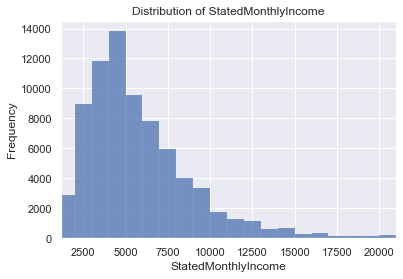

In [38]:
make_hist(col_name="StatedMonthlyIncome",step=1000,kde=False)
plt.xlim([1200,21000]);

According to this histogram there are some unusual values. In fact, the values that lie outside of the range
[1200,21000] could be considered unusual. They are only 2% of the data. The data appears to be right skewed.

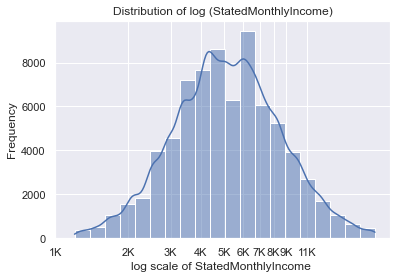

In [39]:
mask=(data['StatedMonthlyIncome']<=21000)&(data['StatedMonthlyIncome']>1200)
sb.histplot(data=data[mask],x="StatedMonthlyIncome",bins=20,kde=True,log_scale=True)
plt.xlabel("StatedMonthlyIncome",fontsize=12)
plt.title("Distribution of log (StatedMonthlyIncome)",fontsize=12)
plt.xlabel("log scale of StatedMonthlyIncome ",fontsize=12)
plt.ylabel("Frequency",fontsize=12)
plt.xticks([k for k in range(1000,10000,1000)]+[11000],[str(k)+"K" for k in range(1,10)]+["11K"]);

After applying a log transformation the distribution becomes more symmetric and it appears to be almost bimodal.

Let's investigate the feature `BorrowerRate` by lookig first at its descriptive statistics and then visulize its distribution. 

In [40]:
data["BorrowerRate"].describe([0.01,0.25,0.5,0.75,0.9,0.95,0.99])

count    76224.000000
mean         0.193624
std          0.074089
min          0.040000
1%           0.064900
25%          0.134900
50%          0.184500
75%          0.254900
90%          0.309900
95%          0.317700
99%          0.344808
max          0.360000
Name: BorrowerRate, dtype: float64

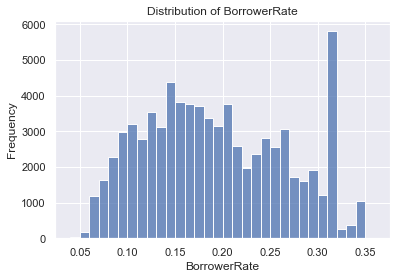

In [41]:
make_hist(col_name="BorrowerRate",step=0.01,kde=False)

We see that the distribution appears to be symmetric to some extend in the range [0.06, 0.30] and then all of a sudden in the next bin there is a high spike and then we see a steep decrease again. Increasing the parameter step in the function `make_hist` makes this phenomenon gradually disappearas it can be seen below.

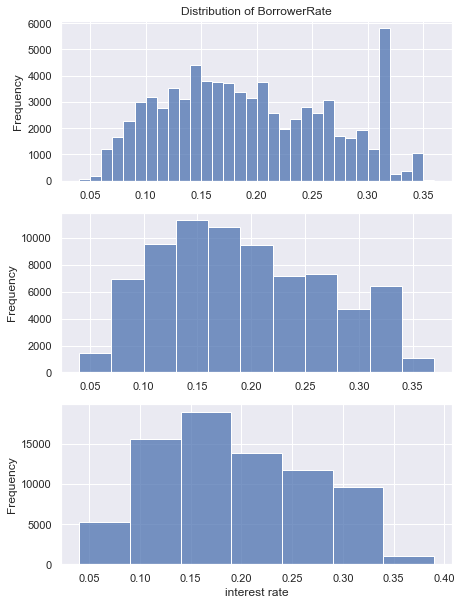

In [42]:
#plt.subplots_adjust(top=10.5)
fig,ax=plt.subplots(nrows=3,figsize=(7,10))
steps=[0.01,0.03,0.05]
for i in range(len(steps)):
    make_hist(col_name="BorrowerRate",step=steps[i],kde=False,ax=ax[i])
    if i==0:
        ax[i].set(ylabel="Frequency",title="Distribution of BorrowerRate",xlabel="")
    if i==1:
        ax[i].set(ylabel="Frequency",title="",xlabel="")
    if i==2:
        ax[i].set(ylabel="Frequency",title="",xlabel="interest rate")
        

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> We are interested in the discrete variable `ProsperScore`, a score which is assigned to the borrowers.Most of the borrowers have been assigned scores between 3 and 9 (over than 86 %). However, the scores 4,6 and 8 are ones of the most frequent ones. Only 1.6% of borrowers have been assigned the best score (11)and 0.9% the worst score (1).

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> We investigated variables such as `DebtToIncomeRatio`,`RevolvingCreditBalance`,`CurrentDelinquencies`,`TotalInquiries`,`AvailableBankcardCredit` and all of them appeared to have skewed distribution with some very small and big unusual values. However, applying  a log transformation to variables such as `DebtToIncomeRatio`,`AvailableBankcardCredit` and 
`RevolvingCreditBalance` their distribution became more symmtric and this fact is very important when it comes to statistical parametric or non paramtric tests. As far as `BorrowerRate` is concerned, this feature presents some symmetry in a range which depends on the width of the bin. For example when the width of the bin 
is 0.01, the distribution is symmetric in the range [0.05,0.30) and then  there is all of a sudden a spike sticking out in the range [0.30,0.31).

## Bivariate Exploration
> i would like to see whether there is a correlation between betweeen features in the data.

In [43]:
quant_var=["ProsperScore_int","RevolvingCreditBalance","DebtToIncomeRatio","CurrentDelinquencies","TotalInquiries",
          "AvailableBankcardCredit","BorrowerRate","StatedMonthlyIncome"]
qual_var=["Occupation","ListingCategory","IsBorrowerHomeowner"]


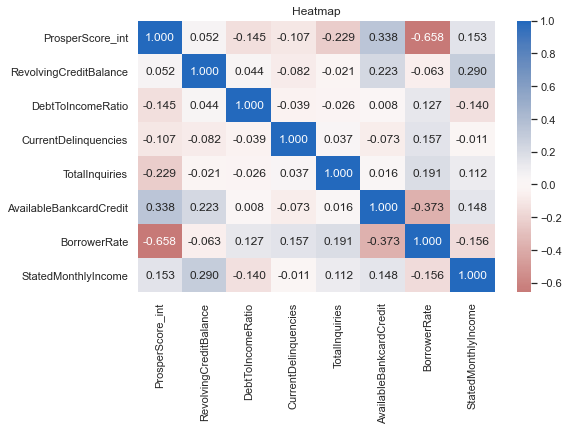

In [44]:
plt.figure(figsize = [8, 5])
sb.heatmap(data[quant_var].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title("Heatmap");


The heatmap shows that the `ProsperScore` is not strongly correlated (linearly correlated) to the aforementioned quantitative variables except possibly for `BorrowerRate`

Next, we investigate the relationships between `ProsperScore_int` and the variables `RevolvingCreditBalance`,`AvaialbleBankcardCredit` and`StatedMonthlyIncome` via a pointplot.

Poinptolot for `ProsperScore` vs `RevolvingCreditBalance`

In [45]:
def pointplot(x,y,units='',estimator=np.median):
    """This function draws the pointplot of two given variables before and after a log transformation"""
    fig,ax=plt.subplots(1,2,figsize=(8,5))
    dic={0:"Before",1:"After"}
    for i in range(2):
        if i==0:
            sb.pointplot(data=data,x=data[x],y=data[y],estimator=estimator,join=False,
            dodge=True,ax=ax[i])
        else:
            sb.pointplot(data=data,x=data[x],y=np.log10(data[y]+i),estimator=estimator,join=False,
            dodge=True,ax=ax[i])
        if len(units)and i==0:
            ax[i].set(title=f"{dic[i]} a log transformation",xlabel=x,ylabel='Median of '+y+f' ({units})')
        elif len(units)==0 and i==0:
            ax[i].set(title=f"{dic[i]} a log transformation",xlabel=x,ylabel='Median of '+y)
            
        else:
            ax[i].set(title=f"{dic[i]} a log transformation",xlabel=x,ylabel='')

  
    

Text(0.5, 0.98, 'Pointplot of RevolvingCreditBalance vs ProsperScore')

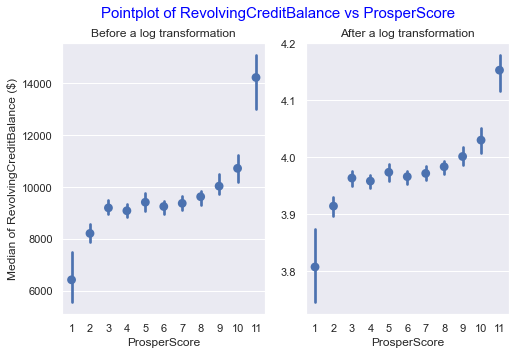

In [46]:
pointplot(x="ProsperScore",y="RevolvingCreditBalance",units="$")    
plt.suptitle("Pointplot of RevolvingCreditBalance vs ProsperScore",fontsize=15,color="blue")

We can definitely observe the effect of RevolvingCreditBalance on the borrowers' ProsperScore. The higher score (lower risk)is the larger Revovling Credit Balance corresponds either before or after  the transformation. However, we'd expect that the high scores would corrspond to low Revovling Credit Balance. In the multivariate analysis this topic will be more clear.

Poinptolot for `ProsperScore` vs `AvailableBankcardCredit`

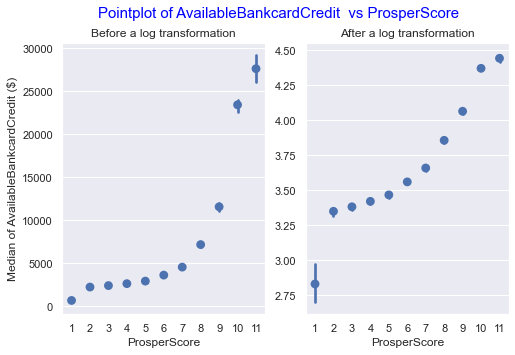

In [47]:
pointplot(x="ProsperScore",y="AvailableBankcardCredit",units="$") 
plt.suptitle("Pointplot of AvailableBankcardCredit  vs ProsperScore",fontsize=15,color="blue");   

Again we observe the increasing trend between the variables `ProsperScore` and `AvailableBankcardCredit`. Also, before a log transformation there is a jump in the values of the median bank credits, especially, at the scores 10 and 11. After a log transformation, we do not observe such a sudden jump ( the trend increases gradually)

Poinptolot for `ProsperScore` vs `StatedMonthlyIncome`

Text(0.5, 0.98, 'Pointplot of StatedMonthlyIncome  vs ProsperScore')

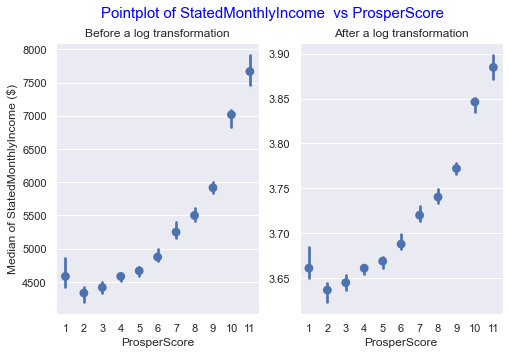

In [48]:
pointplot(x="ProsperScore",y="StatedMonthlyIncome",units="$")
plt.suptitle("Pointplot of StatedMonthlyIncome  vs ProsperScore",fontsize=15,color="blue")

The correlation between `StatedMonthlyIncome` and `PropsperScore` appears to be strong and in a positive direction.

Here we'd like to make two obervations for all of the previous pointplots. First, we examined the relationship between `ProsperScore` and the medians of the previous variables. Second, we chose medians because the aforementioned features seem to have very skewed distributions.

We keep investigating the relationship between `ProsperScore`,`TotalInquiries`,`CurrrentDelinquencies` and
`DebtToIncomeRatio` via a point plot.

Text(0.5, 0.98, 'Pointplot of DebtToIncomeRatio vs ProsperScore')

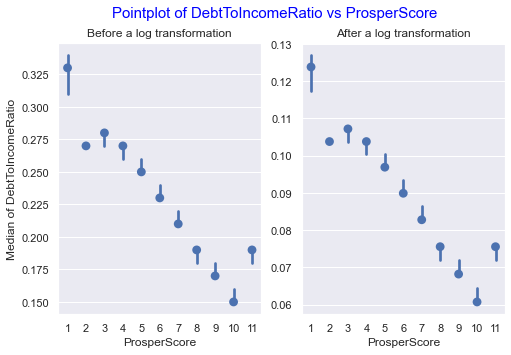

In [49]:
pointplot(x="ProsperScore",y="DebtToIncomeRatio",units="")
plt.suptitle("Pointplot of DebtToIncomeRatio vs ProsperScore",fontsize=15,color="blue")

Already from this plot we can see a strong negative relationship bwtween `ProsperScore` and `DebtToIncomeRatio`
As the score increases, i.e moving towards to a score of lower risk, the medians `DebtToIncomeRatio` decreases rapidly. However, at the score 11 (lower risk) the median jumps up again.

Text(0.5, 0.98, 'Pointplot of BorrowerRate vs ProsperScore')

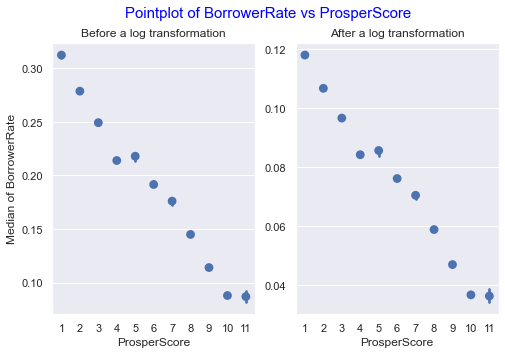

In [50]:
pointplot(x="ProsperScore",y="BorrowerRate",units="")
plt.suptitle("Pointplot of BorrowerRate vs ProsperScore",fontsize=15,color="blue")

We see a strong negative almost linear correlation between the medians of `BorrowerRate` and `ProsperScore`.

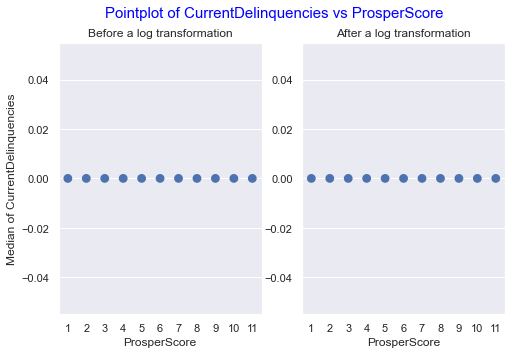

In [51]:
pointplot(x="ProsperScore",y="CurrentDelinquencies",units="",estimator=np.median)#pointplot between ProsperScore and 
#CurrentDelinquencies
plt.suptitle("Pointplot of CurrentDelinquencies vs ProsperScore",fontsize=15,color="blue");

As we can see the medians by themselves cannot determine the score assigned to the borrowers. However, if compare `ProsperScore` to the averages of `CurrentDelinquencies` we get the plot below which highlights the relation (descreasing trend) between these two features.

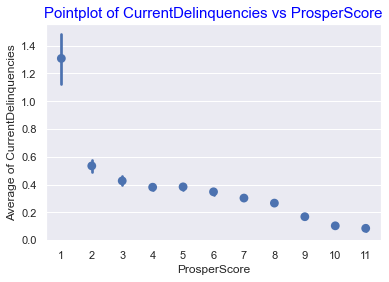

In [52]:
sb.pointplot(data=data,x="ProsperScore",y="CurrentDelinquencies",
             estimator=np.mean,join=False)#pointplot between ProsperScore and 
#CurrentDelinquencies
plt.ylabel("Average of CurrentDelinquencies")
plt.title("Pointplot of CurrentDelinquencies vs ProsperScore",fontsize=15,color="blue");


Once the medians are replaced with the avereages, we can see that the averages drop down drastically after score 1(high risk). Another thing we can observe that high scores (9,10,11, i.e. low risk) are assigned with very low number of delinquencies.

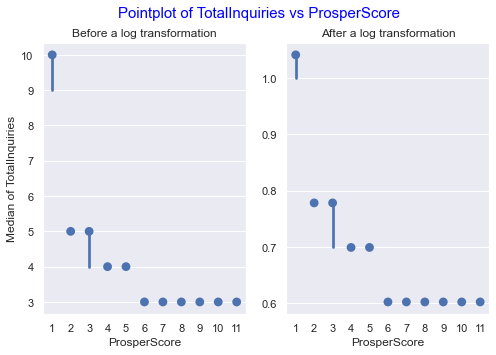

In [53]:
pointplot(x="ProsperScore",y="TotalInquiries",units="",estimator=np.median)
ax[0].set(ylim=[0,18])#keep the values in the range [1%,99%]
plt.suptitle("Pointplot of TotalInquiries vs ProsperScore",fontsize=15,color="blue");

Here we observe a nice insight. The less inquiries (always referred to the medians) borrowers have the better score (low risk) they have been assigned. At least this is clear for the range of scores from 1 to 6. Beyond that range, the number of total inquiries do not distinguish by itself the score assigned to a borrower. However, if we replace the medians with the averages of `TotalInquires` then we can see the relationship of these two features for the whole range of scores assigned by Prosper as it is shown by the the code below.



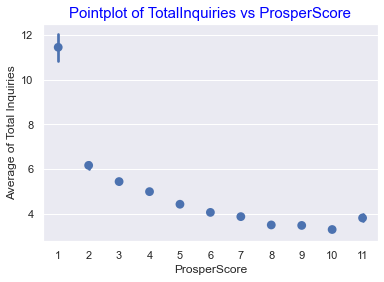

In [54]:
sb.pointplot(data=data,x="ProsperScore",y="TotalInquiries",
             estimator=np.mean,join=False)#pointplot between ProsperScore and 
#Totalinquiries
plt.ylabel("Average of Total Inquiries")
plt.title("Pointplot of TotalInquiries vs ProsperScore",fontsize=15,color="blue");

As we would possibly expect that we'd see a decreasing trend between `PropserScore` and the average of `TotalInquiries`. And again we can see good scores are assigned to the borrowers with low number of total inquiries (on average).

It would be very useful to look at the distribution of `CurrentDelinquencies` and `TotalInquiries` based on the 
`ProsperScore` to get a further insight.

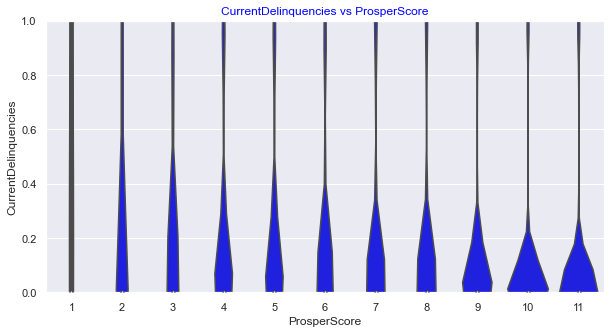

In [55]:
#Distributiion of Currentdelinquencies based on the prosper score
plt.figure(figsize=(10,5))
sb.violinplot(data=data,x="ProsperScore",y="CurrentDelinquencies",color="blue")
plt.title("CurrentDelinquencies vs ProsperScore",color='blue',fontsize=12)
plt.ylim([0,1]);

 The pointplot of `CurrentDelinquencies` vs `ProsperScore` by itself was not able to distinguish the median scores assigned to the borrowers. However, the violinplots make it clear that the decrease in the number of `CurrentDelinquencies ` leads to the increase of the scores. The distributions of current delinquencies for low scores in the range of [1,3] have heavier right tails and they are different from the distributions for higher scores in the range of [4,11].

Next, we investigate the distribution of `TotalInquiries` vs `Prosperscore` 

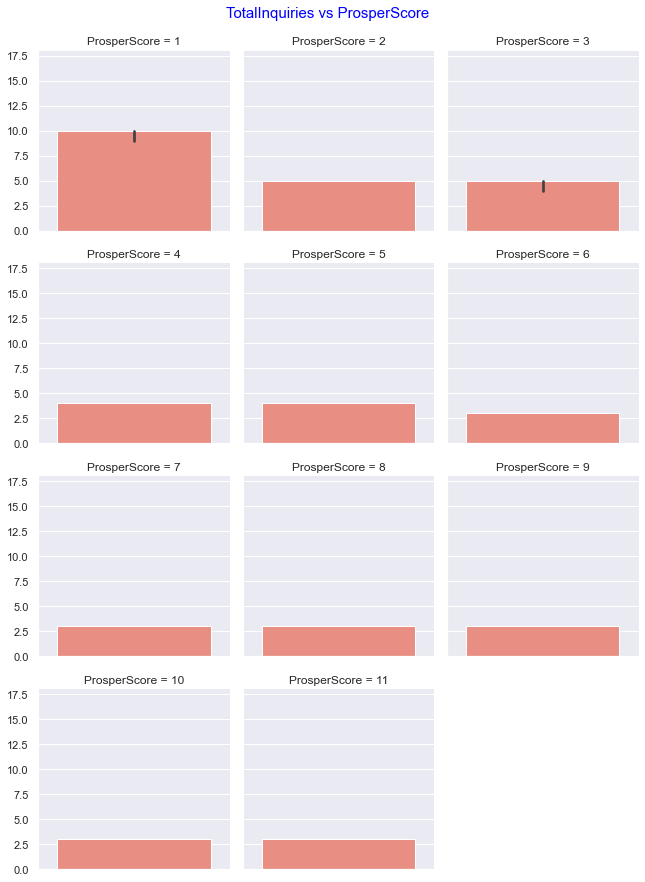

In [56]:
g=sb.FacetGrid(data=data,col="ProsperScore",col_wrap=3)
g.map_dataframe(sb.barplot,y="TotalInquiries",color="salmon",estimator=np.median)
plt.ylim([0,18])
plt.suptitle("TotalInquiries vs ProsperScore",x=0.5,y=1.02,color="blue",fontsize=15);

The barcharts here convey a lttile bit more information than the point plot in the case of `TotalInquires` vs `ProsperScore`. The feature `TotalInquires` is capable of distinguishing the scores in the range [1,5] and the scores between the range [6,9] and the range [10,11].

Next, we'd like to take a deeper look at the distributions of `RevolvingCreditBalance`, `AvailableBankcardCredit`,`DebtToIncomeRatio`, `StatedMonthlyIncome` and `BorrowerRate` based on `ProsperScore`. For this task we will be using violin plots.

In [57]:
data_sample=data.sample(n=500,replace=False,random_state=1)#Take the sample of 500. The data is very large
cols=["RevolvingCreditBalance","AvailableBankcardCredit",'DebtToIncomeRatio','StatedMonthlyIncome',
     'BorrowerRate']#Features for investigation
outliers_excl={0:[0,149000],1:[0,84000],2:[0.04,0.72],3:[1200,21000],4:[0.06,0.35]}#outliers excluded. 
#This range of outliers comes from the univariate analysis
    
      

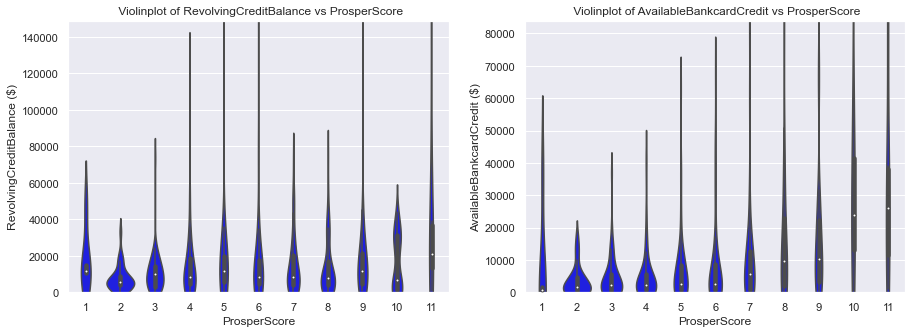

In [58]:
#Make the violin plots for RevolvingCreditBalance vs PropserScore and AvailableBankcardCredit vs PropserScore
fig,ax=plt.subplots(1,2,figsize=(15,5))
for j in range(2):
    sb.violinplot(data=data_sample,x="ProsperScore",y=cols[j],color="blue",ax=ax[j],kind="violin")
    ax[j].set(title=f" Violinplot of {cols[j]} vs ProsperScore",ylim=outliers_excl[j],ylabel=f"{cols[j]} ($)")

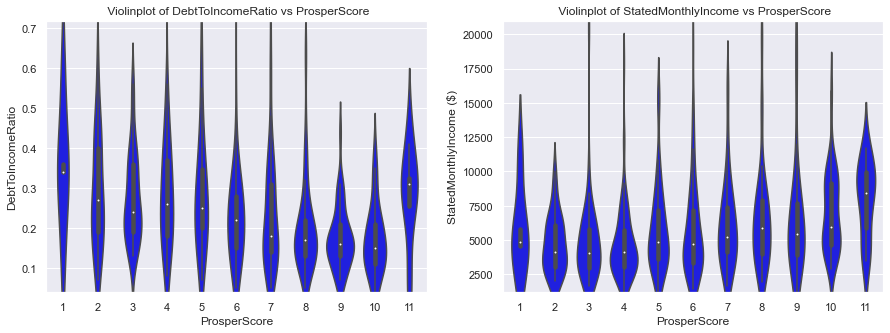

In [59]:
#Make the violinplots for DebtToIncomeRatio vs ProsperScore and StatedMonthlyIncome VsPropserScore
fig,ax=plt.subplots(1,2,figsize=(15,5))
for j in range(2):
    sb.violinplot(data=data_sample,x="ProsperScore",y=cols[2+j],color="blue",ax=ax[j],kind="violin")
    ax[j].set(title=f" Violinplot of {cols[2+j]} vs ProsperScore",ylim=outliers_excl[2+j])
    if j==1:
        ax[j].set(ylabel=f"{cols[2+j]} ($)")


The violin plots clearly indicate that there is a relationshp between `ProsperScore` and `RevolvingCreditBalance`,`AvailableBankcardCredit`,`DebtToIncomeRatio`and `StatedMonthlyIncome`. In fact, these plots showcase that the distributions of the aforementiones features are clearly distinguished for low and high scores. This is very apparent for the feature `DebtToIncomeRatio` and the highest score (11 low risk) has been
assigned to borrowers even with the high debt to income ratio which I wasn't expecting. The last point will be clarified more in the multivariate analysis.

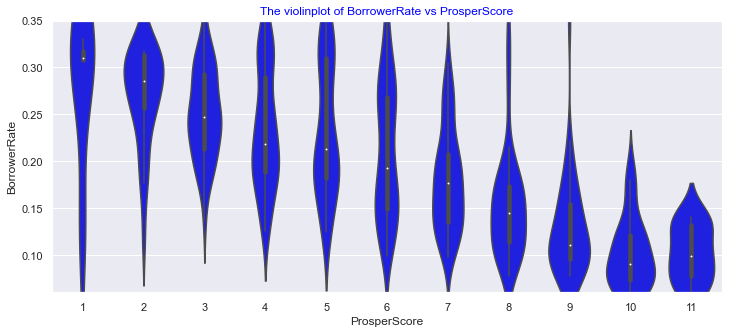

In [60]:
#Violinplot of BorrowerRate vs PropserScore
plt.figure(figsize=(12,5))
sb.violinplot(data=data_sample,x="ProsperScore",y=cols[4],color="blue",kind="violin")
plt.title(f"The violinplot of {cols[4]} vs ProsperScore",color="blue")
plt.ylim(outliers_excl[4]);

There is a clear relationship between `PropserScore` and `Borrowerrate`. We can see as the ProsperScore increases the borrower's rate falls down. In addition, with the aid of violin plots, we can see that the borrower's rate in the area of 0.30 corresponds to scores 1 and 2. However, in univariate exploration we could see the spike in the area of 0.30 in the `BorrowerRate`histogram but we did not know what scores it was associated with.

Next, we'd like to see if there is some interaction bettween `ProsperScore` and some qualitative variables such as `Occupation`,`ListingCategory` and `IsBorrowerHomeowner`.
`

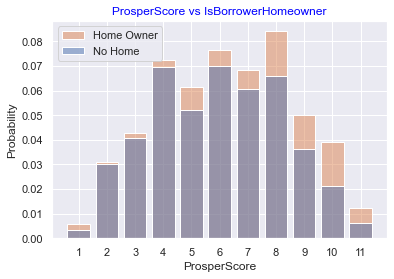

In [61]:
#Let'check the potential interaction between PropserScore and IsBorrowerHomeowner
sb.histplot(data=data,x="ProsperScore",hue="IsBorrowerHomeowner",alpha=0.5,discrete=True,
            stat="probability",shrink=0.8)#Displays proportions instead of pure counts
labels=["Home Owner","No Home"]
plt.legend(labels,loc="upper left")
plt.xticks([k for k in range(1,12)],[str(k) for k in range(1,12)])
plt.title("ProsperScore vs IsBorrowerHomeowner",color="blue");

It seems that there is some interaction between `ProsperScore`and `IsBorrowerHomeowner` especially for the range of big scores [5,11]. We can see that the higher the score gets in the range [5,11] the more frequently it is assigned to home owners.

Next, we check whether there is an interaction between `ProsperScore` and `ListingCategory`

In [62]:
#There are many outliers for ListingCategory, we will get the most frequent categories (reasons for taking loans)
total=data["ListingCategory"].value_counts().sum()
list_cat_prob=(data["ListingCategory"].value_counts()/total)*100#displays probability for each category
list_cat_prob.loc[1.0:13.0].sum()#includes 92% of categories

92.72619906830262

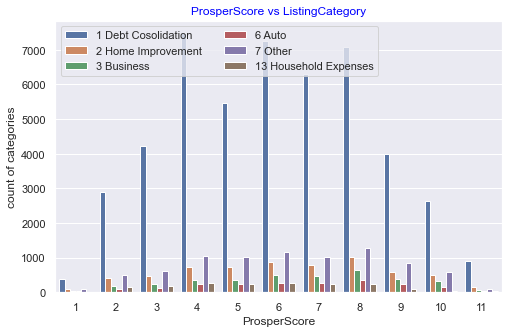

In [63]:
plt.figure(figsize=(8,5))
idx=list_cat_prob.loc[1.0:13.0].index
new_data=data.set_index("ListingCategory").loc[idx].reset_index()#data with the most frequent categories
sb.countplot(data=new_data,x="ProsperScore",hue="ListingCategory")
labels=['1 Debt Cosolidation','2 Home Improvement','3 Business','6 Auto','7 Other','13 Household Expenses']
plt.legend(labels,loc="upper left",ncol=2)
plt.ylabel("count of categories",fontsize=12)
plt.title("ProsperScore vs ListingCategory",color="blue",fontsize=12);

I do not see any clear connection between `ProsperScore` and `ListingCategory`.

Next, we are looking at the features `Prosperscore` and `Occupation`.

/Users/dimitrioskarslidis/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


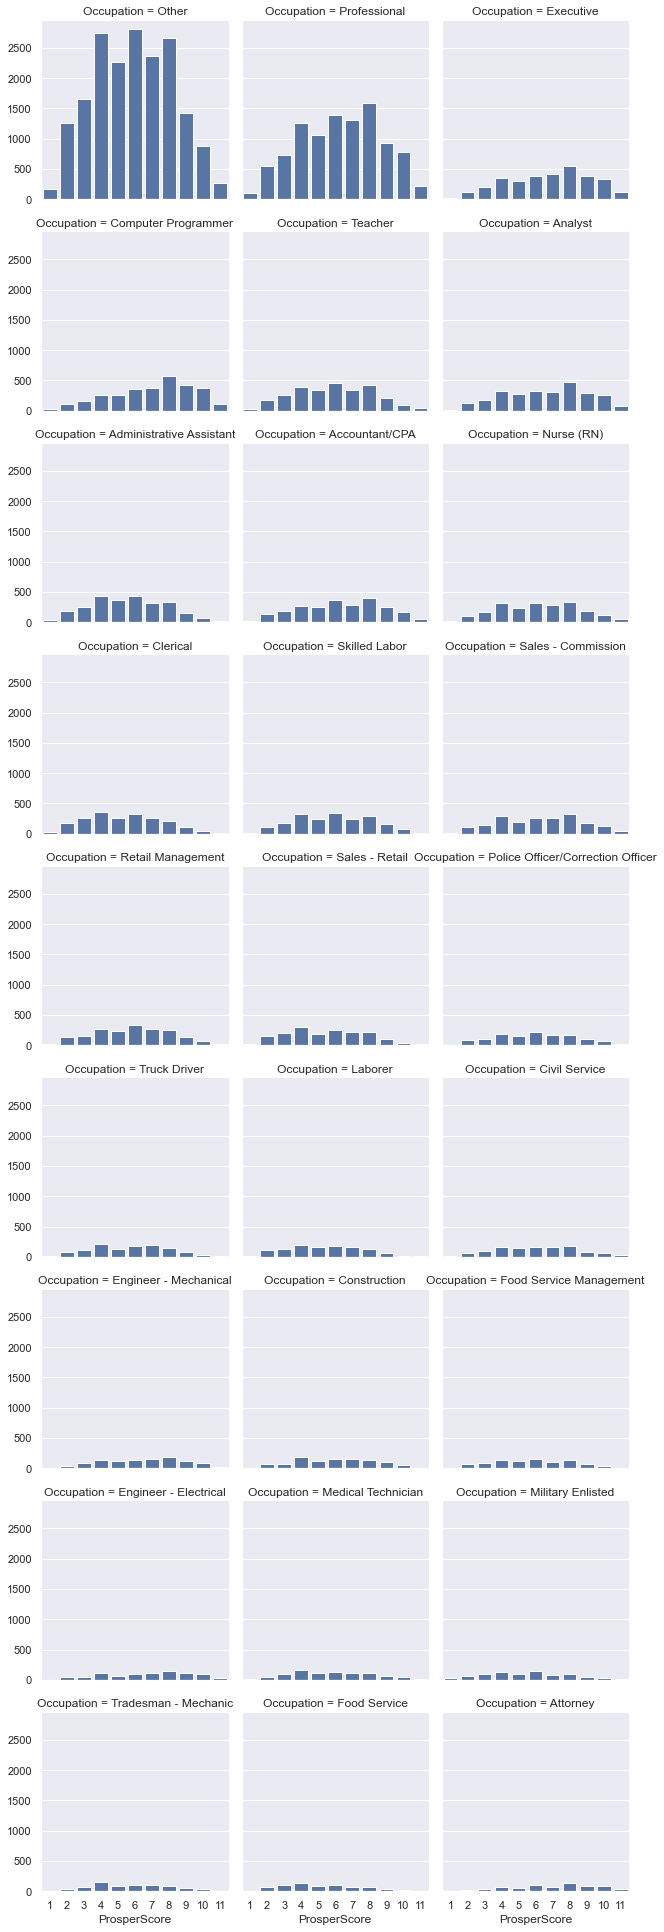

In [64]:
total=data.Occupation.value_counts().sum()
occup_prob=(data.Occupation.value_counts()/total)*100 #proportione for each profession
idx=occup_prob.loc["Other":"Attorney"].index#includes the most frquent professions (91% of borrowers have
#these professions)
occup_data=data.set_index("Occupation").loc[idx].reset_index()
g=sb.FacetGrid(data=occup_data,col="Occupation",col_wrap=3,xlim=[1,11])
g.map(sb.countplot,"ProsperScore")

I do not see any clear relationship between `"ProsperScore` and `Occupation`.

In the previous cells we saw that feaures such as `RevolvingCreditBalance`, `AvailableBankcardCredit`,`StatedMonthlyIncome`, `BorrowerRate` and `DebtToIncomeRatio` are related to `ProsperScore`.  It would be interesting to know if they are related to each other.

Text(0.5, 1.02, 'Scatter Matrix')

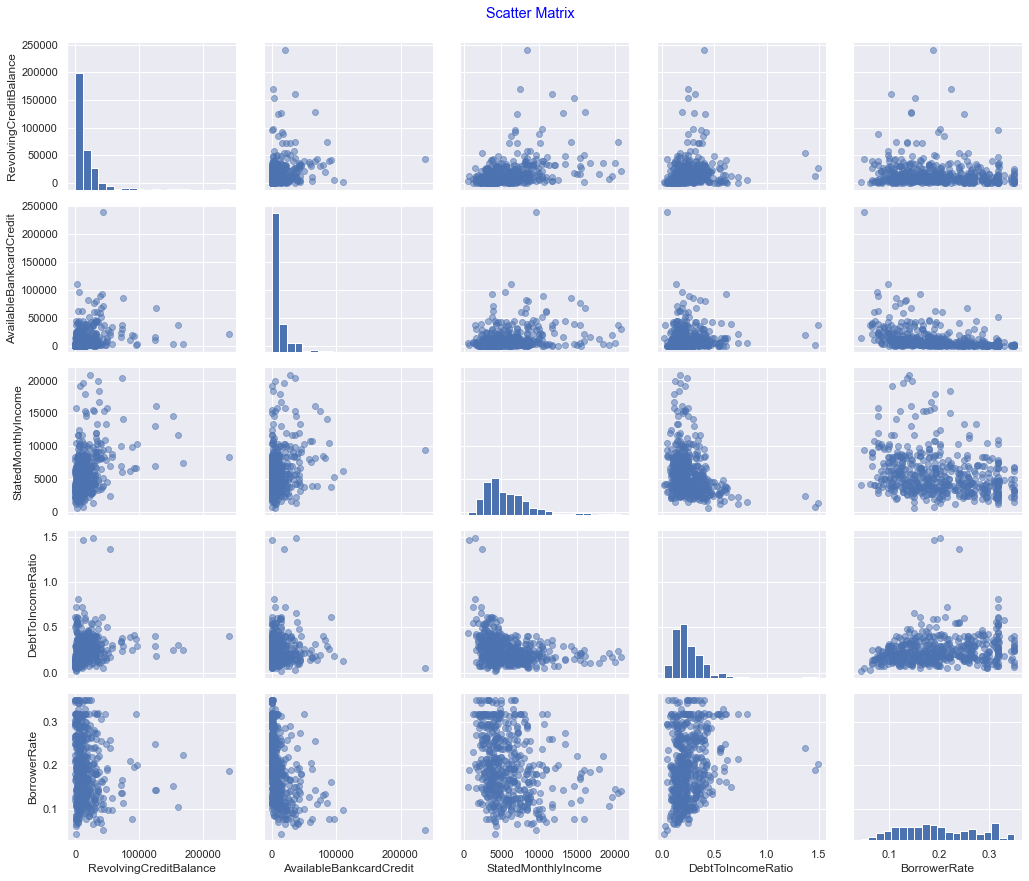

In [65]:
#Let's investigate if there relationship between the features RevolvingCreditBalance, AvailableBankcardCredit 
#andStatedMonthlyIncome
g = sb.PairGrid(data = data_sample, vars = ['RevolvingCreditBalance','AvailableBankcardCredit',
                                            'StatedMonthlyIncome',"DebtToIncomeRatio","BorrowerRate"],height=2.4,aspect=1.2)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter,alpha=0.5)
plt.suptitle("Scatter Matrix",color="blue",y=1.02)

The scatterplots do not reveal any clear relationship for most of the features in the above scatter matrix. However, if we look a little bit more carefully, we can observe some relatiosnhp between `DebtToIncomeRatio` and `StatedMonthlyIncome`.In fact, it seems that these two features have a hyperbolic relatioship. In addition, some relationshp (increasing trend) seems to exist between `RevovlingCreditBalance` and `StatedMonthlyIncome` and between `AvailableBankcardcredit` and `StatedMonthlyIncome`. Furthermore, there is a relation between   `DebtToIncomeRatio` and `BorrowerRate`.

The correlation coefficient of DebtToIncomeRatio and 1/StatedMonthlyIncome is  0.41531525029045263


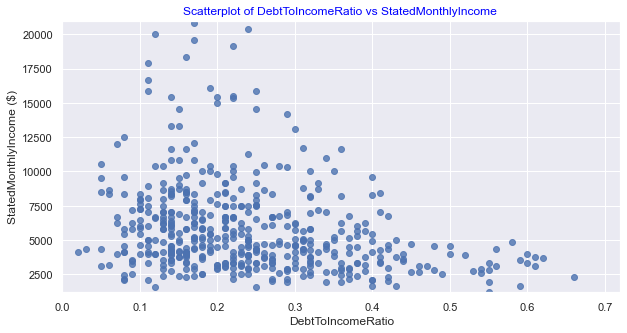

In [66]:
#Let's take a closer at DebtToIncomeRatio and StatedMonthlyIncome
plt.figure(figsize=(10,5))
sb.regplot(data=data_sample,x="DebtToIncomeRatio",y="StatedMonthlyIncome",fit_reg=False,scatter=True)
plt.xlim([0,0.72])
plt.ylim([1200,21000])
plt.ylabel("StatedMonthlyIncome ($)")
print("The correlation coefficient of DebtToIncomeRatio and 1/StatedMonthlyIncome is ",
      np.corrcoef(data["DebtToIncomeRatio"],1/data['StatedMonthlyIncome'])[0,1])#prints the correlation coefficient
plt.title("Scatterplot of DebtToIncomeRatio vs StatedMonthlyIncome ",color="blue",fontsize=12);

This scatterplot indicates some hyperbolic relationship between`DebtToIncomeRatio` and `StatedMonthlyIncome`. This point is strengthened by the fact that correlation coefficient has been increasd to 0.41 (before it was -0.140). This hyperbolic relation tells us the following: the more money we owe the smaller income we have at the end.

Next, we take a closer look at `DebtToIncomeRatio` and `BorrowerRate`

/Users/dimitrioskarslidis/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'The scatterplot of DebtToIncomeRatio vs BorrowerRate ')

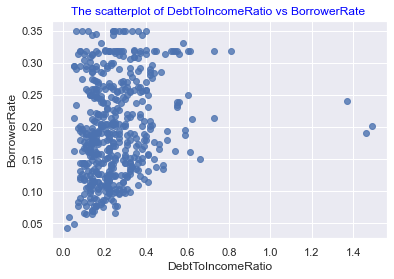

In [67]:
sb.regplot(data_sample["DebtToIncomeRatio"],data_sample['BorrowerRate'],fit_reg=False,scatter=True)
plt.title("The scatterplot of DebtToIncomeRatio vs BorrowerRate ",color="blue")


There is definitely some increasing relationship between `DebtToIncomeRatio` and `BorrowerRate` especially 
for debt to income ratio values in the range of [0.0,0.6].

Next, we want to see whether there is a relation between `BorrowerRate` and `IsBorrowerHomeowner`.

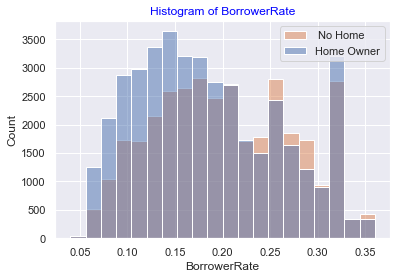

In [68]:
sb.histplot(data=data,x="BorrowerRate",hue='IsBorrowerHomeowner',alpha=0.5,legend=False,hue_order=[1,0],bins=20)
labels=[" No Home","Home Owner"]
plt.legend(labels)
plt.title("Histogram of BorrowerRate",color="blue");


The relation between these two features is apparent especially for the range of small values of rates. People who owe homes is more likely to have smaller rate (except for the rates in the range of [0.30,0.35] than the ones without home.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> We found out that the feature `ProsperScore` had a striking relation to variables such as `AvailableBankcardcredit` (increasing trend of medians), `RevolvingCreditBalance` (increasing trend of medians, although I expected a decreasing trend), `DebtToIncomeRatio` (decreasing trend of medians),`BorrowerRate` (decreasing trend), `StatedMonthlyIncome` (increaasing trend) `CurrentDelinquencies` and `TotalInquiries`(decreasing trend of medians, was only apparent for the range [1,6]) In general, the disributions of the aforementioned features for low scores were distinguished from the distributions for high scores. In addition,
looking at the point plot of `AvailableBankcardcredit` vs `PropserScore` we observed  a rapid jump up of medians at the scores 10, 11. However, when we applied the log transform this rapid jump disappeared. In case of `RevolvingCreditBalance` vs `ProsperScore` we saw an incresing trend, although I expected a decreasing trend
I suspect that there are cases where the high scores (low risk) were given to the borrowers even with big revolving credit balnce (more on this in the multivariate analysis). As far `DebtToIncomeRatio` vs `ProsperScore` is concerned, there was a decreasing trend as I expected with some jump up at score 11 which I was not expecting. Moreover, the categorical variable `IsBorrowerHomeowner` affected the ditribution of `ProsperScore` especially for the range of scores [5,11].The home owners were assigned scores from the range of [5,11] more frequently.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> `StatedMonthlyIncome` was related to `DebtToIncomeRatio`,`RevolvingCreditBalance` and `AvailablBankcardCredit` In case of `StatedMonthlyIncome` vs `DebtToIncomeRatio`, we could observe almost a hyperbolic relationship between these two variables. Also, `DebtToIncomeRatio` was related in very steep increasing manner to `BorrowerRate` even for the small range of debt to income ratio values. Also people who had homes were borrowing money at lower rate than those ones who did not owe a home. Last thing to observe is that if we want to build a model for predicting the loan status we should not include the variable `StatedMonthlyIncome` in our machine learning model to avoid multicollinearity since it is correlated to many other vatiables 

## Multivariate Exploration

In the previous sections we saw a strong relationship between `PropserScore` and `RebvolvingCreditBalance`,`AvailableBankcardCredit`, `DebtToIncomeRatio` and `BorrowerRate`. Now we'd like to see how the categorical variable `IsBorrowerHomeowner` and `Incomeverifiable` affects some of these relationships.

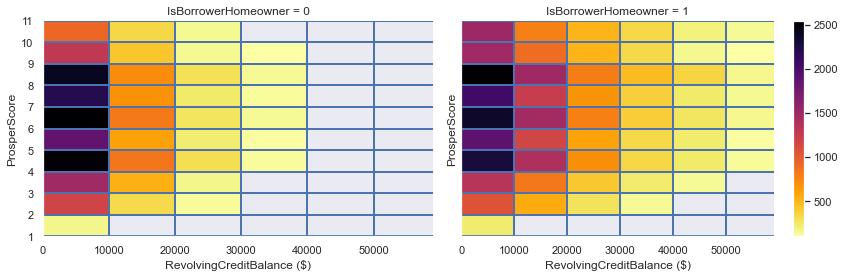

In [69]:
#Check how IsBorrowerHomeowner affects the relationship of "RevolvingCreditBalance" and PropserScore
bin_x=np.arange(data["RevolvingCreditBalance"].min(),data["RevolvingCreditBalance"].max()+10000,10000)
bin_y=[k for k in range(1,12)]
g=sb.FacetGrid(data=data,col="IsBorrowerHomeowner",height=4,aspect=1.5)
g.map_dataframe(plt.hist2d,x="RevolvingCreditBalance",y="ProsperScore_int",cmin=100,bins=[bin_x,bin_y],
                cmap="inferno_r")
plt.xlim([0,59000])#This removes ouliers from RevolvingCreditBalance
g.set(ylabel="ProsperScore")
g.set(xlabel="RevolvingCreditBalance ($)")
plt.yticks([k for k in range(1,12)],[k for k in range(1,12)])
plt.colorbar();

When the borrowers do not possess a home then good scores assigned mostly to those borrowers having low revolving credit balance. However, when the borrowers have a home property then we can see that good scores are assigned even to some borrowers having high revolving credit balance (probably the investors have more trust 
in home owners) and this explains the increasing trend we saw in the point plot between `RevolvingCreditBalance` and `PropserScore`  As a result, the feature `IsBorrowerHomeowner` affects the dynamic of `RevolvingCreditBalance` and `PropserScore`.


Next, we want to see if `IsBorrowerHomeowner` affects the dynamic of `AvailableBankcardCredit` and `PropsperScore`.

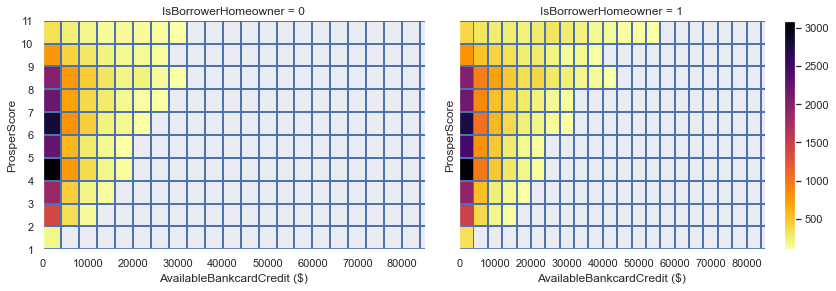

In [70]:
#Check how IsBorrowerHomeowner affects the relationship of "RevolvingCreditBalance" and PropserScore
bin_x=np.arange(data["AvailableBankcardCredit"].min(),data["AvailableBankcardCredit"].max()+4000,4000)
bin_y=[k for k in range(1,12)]
g=sb.FacetGrid(data=data,col="IsBorrowerHomeowner",height=4,aspect=1.5)
g.map_dataframe(plt.hist2d,x="AvailableBankcardCredit",y="ProsperScore_int",cmin=100,bins=[bin_x,bin_y],
                cmap="inferno_r")
plt.xlim([0,85000])#This removes ouliers from AvailableBankcardCredit
g.set(ylabel="ProsperScore")
g.set(xlabel="AvailableBankcardCredit ($)")
plt.yticks([k for k in range(1,12)],[k for k in range(1,12)])
plt.colorbar();

It seems the feature `IsBorrowerHomeowner` does not affect the dynamic of `AvailableBankcardCredit` and `ProsperScore`.

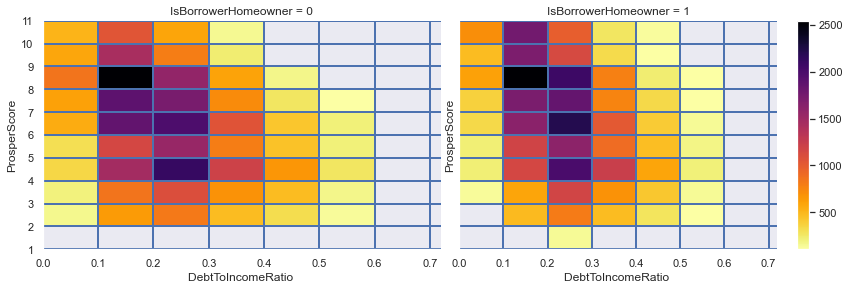

In [71]:
#Interaction between ProsperScore DebtToIncomeratio and IBorrowerHomeOwner
bin_x=np.arange(data["DebtToIncomeRatio"].min(),data["DebtToIncomeRatio"].max()+0.1,0.1)
bin_y=[k for k in range(1,12)]
g=sb.FacetGrid(data=data,col="IsBorrowerHomeowner",height=4,aspect=1.5)
g.map_dataframe(plt.hist2d,x="DebtToIncomeRatio",y="ProsperScore_int",cmin=100,bins=[bin_x,bin_y],
                cmap="inferno_r")
plt.xlim([0,0.72])#This removes ouliers from DebtToIncomeRatio
g.set(ylabel="ProsperScore")
g.set(xlabel="DebtToIncomeRatio ")
plt.yticks([k for k in range(1,12)],[k for k in range(1,12)])
plt.colorbar();

The feature `IsBorrowerHomeowner` does not affect the relationship of `DebtToIncomeRatio` and `ProsperScore`
No matter if the borrowers have a home or not, the distribution of `DebtToIncomeRatio` and `ProsperScore` does not change dramatically.

Next, we investigate if `IncomeVerifiable` affects is a relationship between `DebtToIncomeRatio` vs `PropserScore`

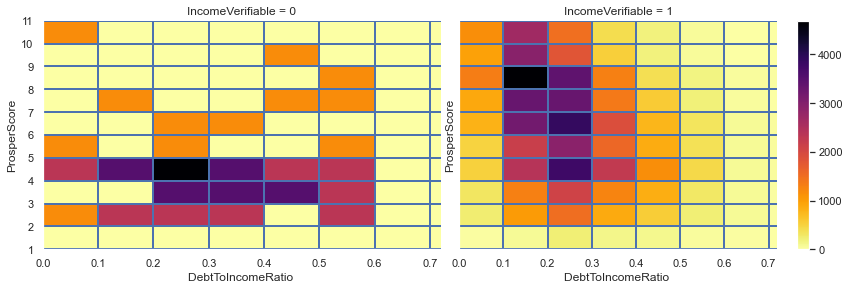

In [72]:
#Interaction between ProsperScore DebToIncomeRatio and InComeVeryfing
bin_x=np.arange(data["DebtToIncomeRatio"].min(),data["DebtToIncomeRatio"].max()+0.1,0.1)
bin_y=[k for k in range(1,12)]
g=sb.FacetGrid(data=data,col="IncomeVerifiable",height=4,aspect=1.5)
g.map_dataframe(plt.hist2d,x="DebtToIncomeRatio",y="ProsperScore_int",cmin=0,bins=[bin_x,bin_y],
                cmap="inferno_r")
plt.xlim([0,0.72])#This removes ouliers from DebtToIncomeRatio
g.set(ylabel="ProsperScore")
g.set(xlabel="DebtToIncomeRatio ")
plt.yticks([k for k in range(1,12)],[k for k in range(1,12)])
plt.colorbar();

The feature `IncomeVerifiable` affects the relationship between `DebtToIncomeratio` and `ProsperScore`. In fact, the borrowers who can justify their income are assigned fairly high scores even if their debt to income ratio is kind of big and this fact explains to some extent the reason we saw a jump up at score 11 (low risk) afer a decreasing trend of`DebtToIncomeratio` vs `ProsperScore`. However, we have to take into our account that we did not have much data about the borrowers whose income wasn't verifiable.

Next, we investigate if `IsBorrowerHomeowner` affects the distribution of `BorrowerRate` and `ProsperScore`.

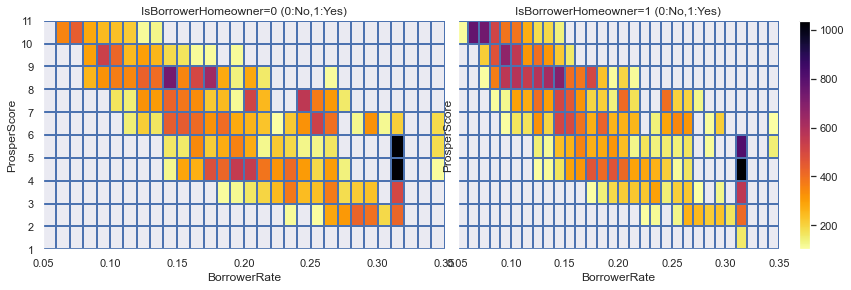

In [73]:

#Interaction between BorrowerRate,ProsperScore and IsBorrowerHomeowner
bin_x=np.arange(data["BorrowerRate"].min(),data["BorrowerRate"].max()+0.01,0.01)
bin_y=[k for k in range(1,12)]
g=sb.FacetGrid(data=data,col="IsBorrowerHomeowner",height=4,aspect=1.5)
g.map_dataframe(plt.hist2d,x="BorrowerRate",y="ProsperScore_int",bins=[bin_x,bin_y],
                cmap="inferno_r",cmin=100)
plt.xlim([0.05,0.35])#This removes ouliers from DebtToIncomeRatio
g.set(ylabel="ProsperScore")
g.set(xlabel="BorrowerRate")
g.set_titles(col_template="IsBorrowerHomeowner={col_name} (0:No,1:Yes)")
plt.yticks([k for k in range(1,12)],[k for k in range(1,12)])
plt.colorbar();

The feature `IsBorrowerHomeowner` affects to some extent the distribution of `BorrowerRate` and `ProsperScore`. The borrowers who have homes more of them than in the case with no home property, have been assigned smaller rates and high score (low risk). They must have gained investors' trust.

Next, we'd like to see whether the vatiable `IsBorrowerHomeowner` adds more insight into 
the relationship of `DebtToIncomeRatio` vs`StatedMonthlyIncome` and `RevolvingCreditbalance` vs `StatedMonthlyIncomeRatio`

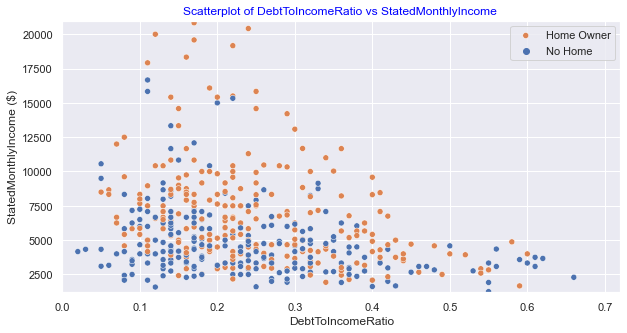

In [74]:
plt.figure(figsize=(10,5))
sb.scatterplot(data=data_sample,x="DebtToIncomeRatio",y="StatedMonthlyIncome",
               hue="IsBorrowerHomeowner")
plt.xlim([0,0.72])
plt.ylim([1200,21000])
plt.ylabel("StatedMonthlyIncome ($)")
plt.title("Scatterplot of DebtToIncomeRatio vs StatedMonthlyIncome ",color="blue",fontsize=12);
plt.legend(labels=["Home Owner","No Home"])

The hyperbolic relationship of `DebtToIncomeRatio` vs `StatedMonthlyIncome` is steeper
(descreasing more rapidly) for the borrowers with no home ownership than for the borrowers who have their own homes.

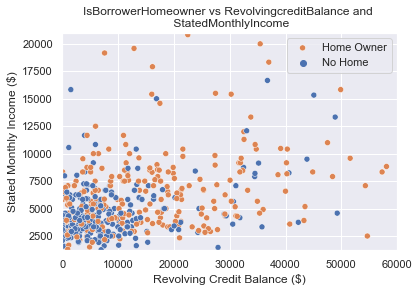

In [75]:
sb.scatterplot(data=data_sample,x="RevolvingCreditBalance",y="StatedMonthlyIncome",
               hue="IsBorrowerHomeowner")
plt.ylabel("Stated Monthly Income ($)")
plt.xlabel("Revolving Credit Balance ($)")
plt.xlim([0,60000])#removes the outliers
plt.ylim([1200,21000])#removes the ouliers
plt.title("IsBorrowerHomeowner vs RevolvingcreditBalance and \n StatedMonthlyIncome")
plt.legend(labels=["Home Owner","No Home"]);

If we look at the scattter matrix from the previous cells we can see that the relationship of `RevolvingCreditBalance` vs `MonthlyStatedIncome` has a kind of increasing trend. However, taking into account the variable `IsBorrowerHomeowner` reveals something interesting. The relationship of  `RevolvingCreditBalance` vs `MonthlyStatedIncome` has an increasing trend for the borrowers who do not have any home ownership. However, for those who possess a home,  the relationship of  `RevolvingCreditBalance` vs `MonthlyStatedIncome` has an descreasing trend up to 30000 and an increasing trend  after 30000.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
>The  variable `IsBorrowerHomeowner` explained the increasing trend between `RevolvingCreditBalance` and `Prosperscore` in more details. In fact, the borrowers who had homes were assigned higher scores even for big values of `RevolvingCreditBalance` than those who did not have any home ownership and this fact explained the increasing trend of 
`RevolvingCreditBalance` vs `ProsperScore`. Moreover, the variable `IncomeVerifiable` affects to some extent the distribution of `DebtToIncomeRatio` and `ProsperScore`. In fact, the borrowers who can justify their income are assigned fairly high scores even if their debt to income ratio is kind of big and this fact explains to some extent the reason we saw a jump up of the median of `DebtToIncomeratio`  at score 11 (low risk) afer a decreasing trend of`DebtToIncomeratio` vs `ProsperScore`

### Were there any interesting or surprising interactions between features?

>The variable `IsBorrowerHomeowner` had an interesting effect on the relationship of `RevolvingCreditBalance` vs `MonthlyStatedIncome`.The relationship of  `RevolvingCreditBalance` vs `MonthlyStatedIncome` has an increasing trend for the borrowers who do not have any home ownership. However, for those who possess a home,  the relationship of  `RevolvingCreditBalance` vs `MonthlyStatedIncome` has an descreasing trend up to 30000 and after 30000 an increasing trend.